## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [26]:
import  IPython.display as dp
# with open('README.md','r+', encoding='utf-8') as f:
#     dp.display(dp.Markdown(f.read()))

> ### Your team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

In [27]:
# Your code here - remember to use markdown cells for comments as well!
from fsds.imports import *

In [28]:
import os
os.listdir()

['LICENSE.md',
 'student.ipynb',
 'awesome.gif',
 'README.md',
 '.gitignore',
 'CONTRIBUTING.md',
 '.ipynb_checkpoints',
 '.learn',
 '.git',
 'module1_project_rubric.pdf',
 'zippedData']

In [29]:
os.listdir('zippedData')

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [30]:
pd.read_csv('zippedData/imdb.name.basics.csv.gz')

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [31]:
import glob
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [32]:
os.path.split(files[0])[-1].replace('.csv.gz','')

'imdb.title.crew'

In [33]:
DATA = {}
for file in files:
    print(file)
    key = os.path.split(file)[-1].replace('.csv.gz','').replace('tsv.gz','')
    if ".tsv" in file:
        sep='\t'
        encode = 'latin-1'#'utf-8'
    else:
        sep=','
        encode='utf-8'
    DATA[key] = pd.read_csv(file,sep=sep,encoding=encode)

zippedData/imdb.title.crew.csv.gz
zippedData/tmdb.movies.csv.gz
zippedData/imdb.title.akas.csv.gz
zippedData/imdb.title.ratings.csv.gz
zippedData/imdb.name.basics.csv.gz
zippedData/rt.reviews.tsv.gz
zippedData/imdb.title.basics.csv.gz
zippedData/rt.movie_info.tsv.gz
zippedData/tn.movie_budgets.csv.gz
zippedData/bom.movie_gross.csv.gz
zippedData/imdb.title.principals.csv.gz


# Preview Data

In [34]:
for tablename, data in DATA.items():
#     print('---'*20+'\n'+f"{tablename}:")
    display(data.head(2).style.set_caption(f"{tablename}"))
    print()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,nan,"nm0175726,nm1802864"


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,nan,nan,0
1,tt0369610,11,Jurashikku warudo,JP,nan,imdbDisplay,nan,0


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,nan,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",nan,nan,104 minutes,nan
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,4.15e+08,652000000,2010
1,Alice in Wonderland (2010),BV,3.342e+08,691300000,2010


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,nan,"[""The Man""]"
1,tt0111414,2,nm0398271,director,nan,nan


In [35]:
dfrt = DATA['rt.movie_info.'].copy()
dfrt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


## Questions

- **Where are the gross box office numbers?**
    - rt.movie_info.
        - Key: ?
        
    - tn.movie_budgets
        - Key:
        
    - bom.movie_gross
        - Key: 
        
- **What website is that table from?**
    - What other tables are from the same source and can be joined easily?

- **What columns may require extensive pre-processing?**
    - Any Genre columns
        - `rt.movie.info.['genre']`

In [90]:
tn_budgets = DATA['tn.movie_budgets'].copy()
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [91]:
bom_gross = DATA['bom.movie_gross'].copy()
bom_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [87]:
# def find_movie(movie):
    

In [86]:
bom_gross['title'].str.contains('Avater').sum()

0

In [ ]:
bom_gross['title'].str.contains('Avater').sum()

In [72]:
DATA['tn.movie_budgets']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


## Aligning The Data

- Make a dictionary of column name to use as key for each dataframe stored in DATA

<details >
    <summary style="font-size:1.1em;background-color:lightblue;width:80%;text-align:center;                   "> Key Columns</summary>    
    
```python
KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}
```


In [37]:
# keys = list(DATA.keys())

KEY_COLS = {'imdb.title.crew': 'tconst', 
        'tmdb.movies': 'id',
        'imdb.title.akas': 'title_id',
        'imdb.title.ratings': 'tconst',
        'imdb.name.basics': 'nconst',
        'rt.reviews.': 'id',
        'imdb.title.basics': 'tconst',
        'rt.movie_info.': 'id',
        'tn.movie_budgets': 'id',
        'bom.movie_gross': 'title',
        'imdb.title.principals': 'tconst'}

In [38]:
DATA['imdb.title.principals']

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [39]:
unique_tconst = {}
for table_name,key_col in KEY_COLS.items():
    table = DATA[table_name]
    print(table_name)
#     print(key_col)

    if 'tconst' in key_col:
        print(key_col)
        print()

        unique_tconst[table_name] = table[key_col].unique()
    else:
        print('N/A')
        
    print()


imdb.title.crew
tconst


tmdb.movies
N/A

imdb.title.akas
N/A

imdb.title.ratings
tconst


imdb.name.basics
N/A

rt.reviews.
N/A

imdb.title.basics
tconst


rt.movie_info.
N/A

tn.movie_budgets
N/A

bom.movie_gross
N/A

imdb.title.principals
tconst




In [40]:
unique_tconst

{'imdb.title.crew': array(['tt0285252', 'tt0438973', 'tt0462036', ..., 'tt9001494',
        'tt9004986', 'tt9010172'], dtype=object),
 'imdb.title.ratings': array(['tt10356526', 'tt10384606', 'tt1042974', ..., 'tt9851050',
        'tt9886934', 'tt9894098'], dtype=object),
 'imdb.title.basics': array(['tt0063540', 'tt0066787', 'tt0069049', ..., 'tt9916706',
        'tt9916730', 'tt9916754'], dtype=object),
 'imdb.title.principals': array(['tt0111414', 'tt0323808', 'tt0417610', ..., 'tt9681728',
        'tt9689618', 'tt9692684'], dtype=object)}

In [41]:
[len(v) for x,v in unique_tconst.items()]

[146144, 73856, 146144, 143454]

In [42]:
matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])==146144 ]
matching_key_cols

['imdb.title.crew', 'imdb.title.basics']

In [43]:
df_imdb = pd.merge(DATA['imdb.title.crew'],DATA['imdb.title.basics'],
                   how='outer',suffixes=('crew','basics') )
df_imdb

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,2012,100.0,Comedy
1,tt0438973,NaN,"nm0175726,nm1802864",Sealand,Sealand,2019,NaN,"Biography,Drama"
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,2012,95.0,Comedy
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,2010,82.0,Thriller
...,...,...,...,...,...,...,...,...
146139,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,2018,80.0,Documentary
146140,tt9001390,nm6711477,nm6711477,The woman and the river,The woman and the river,2017,88.0,"Drama,Mystery"
146141,tt9001494,"nm10123242,nm10123248",NaN,Stone Mountain Georgia 08.28.18,Stone Mountain Georgia 08.28.18,2018,5.0,"Documentary,History,News"
146142,tt9004986,nm4993825,nm4993825,Syndebukken: Prosessen mot Harry Lindstrøm,Syndebukken: Prosessen mot Harry Lindstrøm,2018,NaN,Documentary


In [44]:
non_matching_key_cols = [k for k in unique_tconst if len(unique_tconst[k])!=146144 ]
non_matching_key_cols

['imdb.title.ratings', 'imdb.title.principals']

In [45]:
[DATA[x].shape for x in non_matching_key_cols] 

[(73856, 3), (1028186, 6)]

### Notes: COLUMNNS OF INTEREST
    - "averagerating"(imdb.ratings)

In [46]:
display(DATA[non_matching_key_cols[0]],DATA[non_matching_key_cols[1]])

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [47]:
df_imdb

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,2012,100.0,Comedy
1,tt0438973,NaN,"nm0175726,nm1802864",Sealand,Sealand,2019,NaN,"Biography,Drama"
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,2012,95.0,Comedy
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,2010,82.0,Thriller
...,...,...,...,...,...,...,...,...
146139,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,2018,80.0,Documentary
146140,tt9001390,nm6711477,nm6711477,The woman and the river,The woman and the river,2017,88.0,"Drama,Mystery"
146141,tt9001494,"nm10123242,nm10123248",NaN,Stone Mountain Georgia 08.28.18,Stone Mountain Georgia 08.28.18,2018,5.0,"Documentary,History,News"
146142,tt9004986,nm4993825,nm4993825,Syndebukken: Prosessen mot Harry Lindstrøm,Syndebukken: Prosessen mot Harry Lindstrøm,2018,NaN,Documentary


In [48]:
DATA['imdb.title.ratings']

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [49]:
df = pd.merge(df_imdb, DATA['imdb.title.ratings'],on='tconst',how='outer')
df

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219.0
1,tt0438973,NaN,"nm0175726,nm1802864",Sealand,Sealand,2019,NaN,"Biography,Drama",NaN,NaN
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama,5.5,18.0
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147.0
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,2010,82.0,Thriller,5.8,875.0
...,...,...,...,...,...,...,...,...,...,...
146139,tt8999974,nm10122357,nm10122357,Madre Luna,Madre Luna,2018,80.0,Documentary,NaN,NaN
146140,tt9001390,nm6711477,nm6711477,The woman and the river,The woman and the river,2017,88.0,"Drama,Mystery",NaN,NaN
146141,tt9001494,"nm10123242,nm10123248",NaN,Stone Mountain Georgia 08.28.18,Stone Mountain Georgia 08.28.18,2018,5.0,"Documentary,History,News",NaN,NaN
146142,tt9004986,nm4993825,nm4993825,Syndebukken: Prosessen mot Harry Lindstrøm,Syndebukken: Prosessen mot Harry Lindstrøm,2018,NaN,Documentary,8.4,7.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 10 columns):
tconst             146144 non-null object
directors          140417 non-null object
writers            110261 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null float64
dtypes: float64(3), int64(1), object(6)
memory usage: 12.3+ MB


In [51]:
plt.rcParams['figure.figsize'] = [12,10]

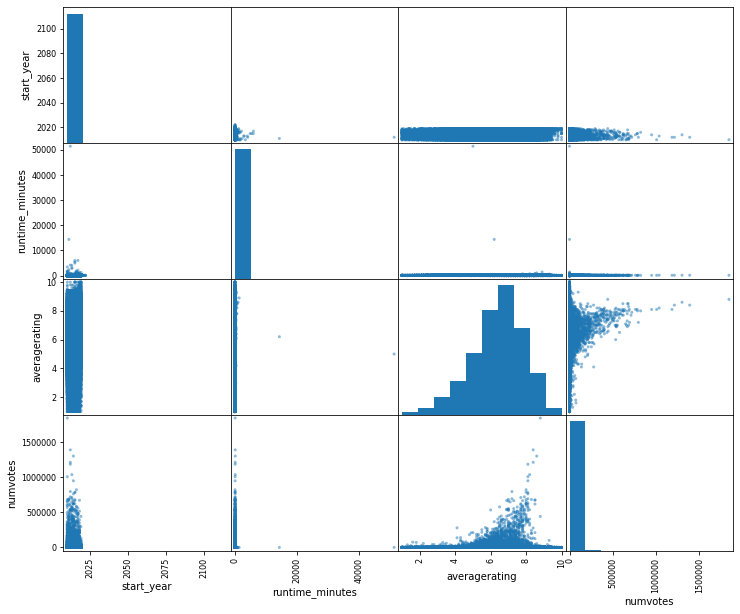

In [52]:
scatmat = pd.plotting.scatter_matrix(df);

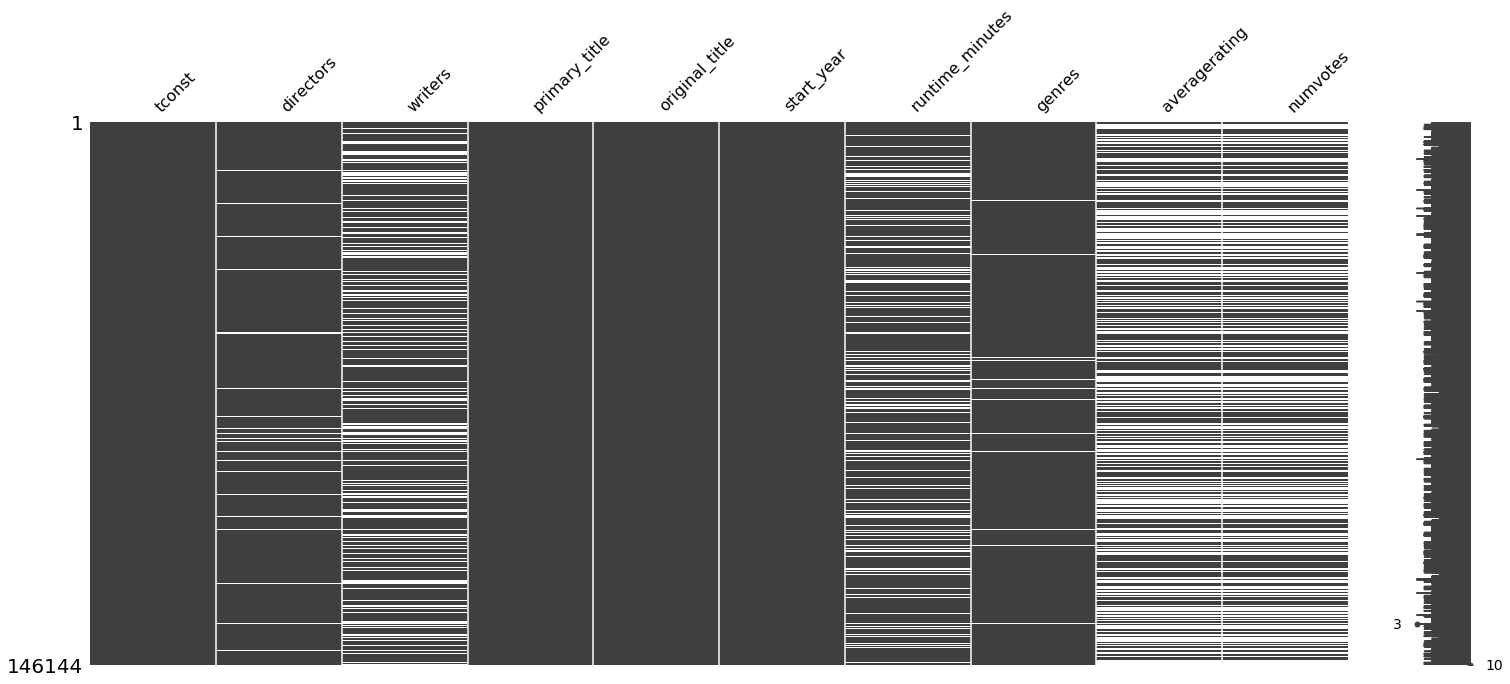

In [53]:
import missingno as ms
ms.matrix(df)

In [54]:
df[df['runtime_minutes'].isna()].isna().sum()

tconst                 0
directors           3342
writers            10649
primary_title          0
original_title        17
start_year             0
runtime_minutes    31739
genres              3236
averagerating      24119
numvotes           24119
dtype: int64

In [55]:
rated = df[df['averagerating'].notnull()].copy()
rated

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219.0
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama,5.5,18.0
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147.0
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,2010,82.0,Thriller,5.8,875.0
5,tt0879859,nm2416460,NaN,Torn,Torn,2010,NaN,Thriller,6.8,21.0
...,...,...,...,...,...,...,...,...,...,...
146120,tt8947660,nm10097606,nm10097614,Goyenda Tatar,Goyenda Tatar,2019,NaN,Adventure,8.1,21.0
146122,tt8948614,"nm0827830,nm0839064",NaN,Reversing Roe,Reversing Roe,2018,99.0,Documentary,7.4,696.0
146123,tt8954732,nm0737517,"nm0076820,nm2997602",The Princess Switch,The Princess Switch,2018,101.0,Romance,6.0,13993.0
146132,tt8991416,nm7731173,nm7731173,Doozy,Doozy,2018,70.0,"Animation,Comedy",6.7,13.0


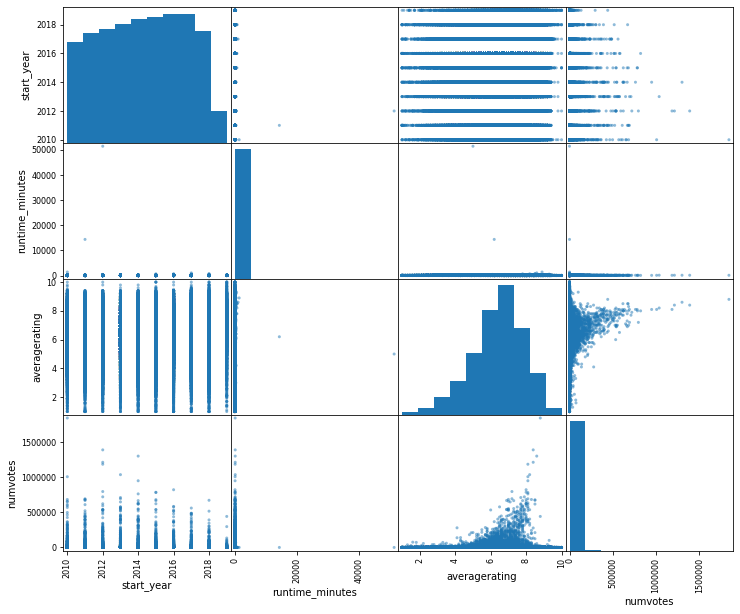

In [56]:
scatmat = pd.plotting.scatter_matrix(rated);

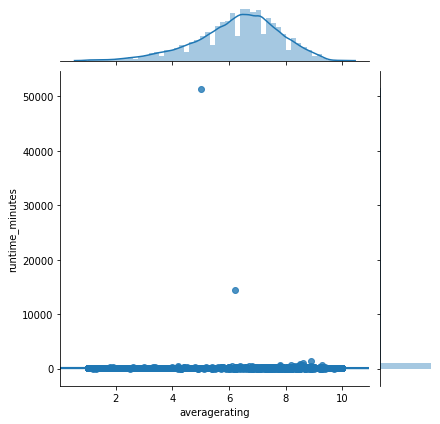

In [57]:
import seaborn as sns
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

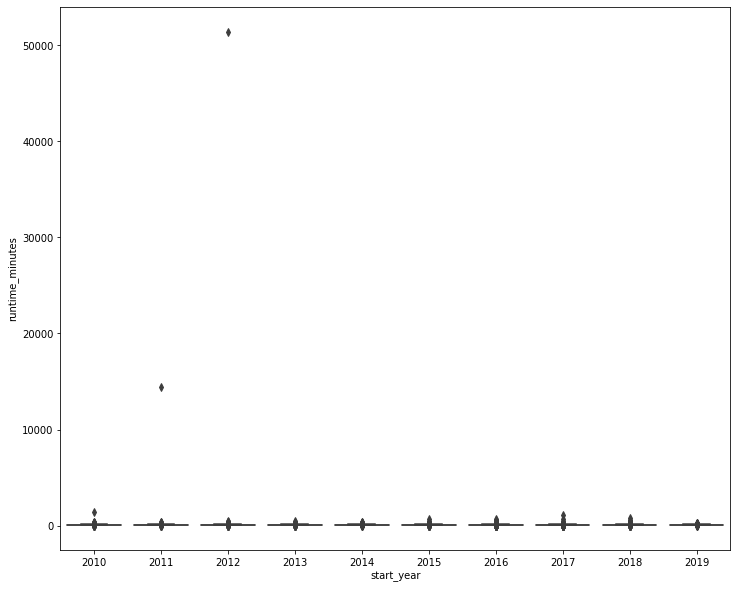

In [58]:
sns.boxplot(x='start_year',y='runtime_minutes',data=rated)

In [59]:
import scipy.stats as st

rated['runtime_minutes']

0         100.0
2         110.0
3          95.0
4          82.0
5           NaN
          ...  
146120      NaN
146122     99.0
146123    101.0
146132     70.0
146142      NaN
Name: runtime_minutes, Length: 73856, dtype: float64

In [60]:
rated.isna().sum()/len(rated)

tconst             0.000000
directors          0.010182
writers            0.142994
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.103174
genres             0.010886
averagerating      0.000000
numvotes           0.000000
dtype: float64

In [61]:
rated.dropna(inplace=True)

In [62]:
idx_outs = np.abs(st.zscore(rated['runtime_minutes'])) >3
idx_outs.sum()

414

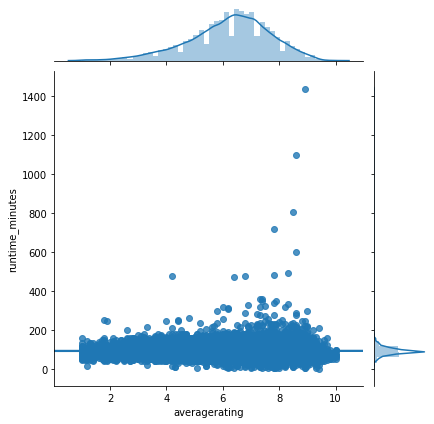

In [63]:
sns.jointplot('averagerating','runtime_minutes',data=rated,kind='reg')

In [64]:
rated['outlier'] = idx_outs

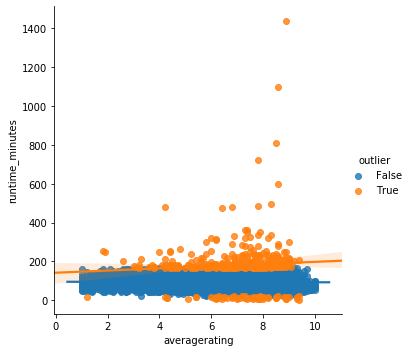

In [65]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated,hue='outlier')

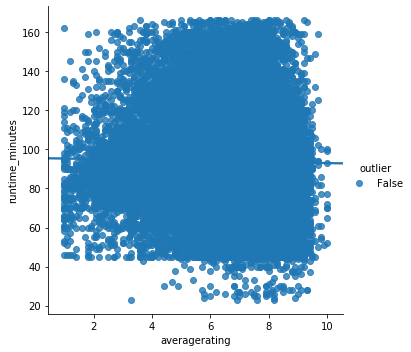

In [66]:
sns.lmplot(x='averagerating',y='runtime_minutes',data=rated[~idx_outs],hue='outlier')

In [70]:
# stop

# Joining dfrt (gross) + df_imdb

In [68]:
dfrt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [69]:
df.head()

,tconst,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0285252,nm0899854,nm0899854,Life's a Beach,Life's a Beach,2012,100.0,Comedy,3.9,219.0
1,tt0438973,NaN,"nm0175726,nm1802864",Sealand,Sealand,2019,NaN,"Biography,Drama",NaN,NaN
2,tt0462036,nm1940585,nm1940585,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110.0,Drama,5.5,18.0
3,tt0835418,nm0151540,"nm0310087,nm0841532",The Babymakers,The Babymakers,2012,95.0,Comedy,5.0,8147.0
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943,Bulletface,Bulletface,2010,82.0,Thriller,5.8,875.0


# Using Movie DataBase API
- https://rapidapi.com/rapidapi/api/movie-database-imdb-alternative/details

In [102]:
stop

NameError: name 'stop' is not defined

In [106]:
df = DATA['tn.movie_budgets']
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [107]:
df['movie']

0                                            Avatar
1       Pirates of the Caribbean: On Stranger Tides
2                                      Dark Phoenix
3                           Avengers: Age of Ultron
4                 Star Wars Ep. VIII: The Last Jedi
                           ...                     
5777                                         Red 11
5778                                      Following
5779                  Return to the Land of Wonders
5780                           A Plague So Pleasant
5781                              My Date With Drew
Name: movie, Length: 5782, dtype: object

In [157]:
import requests

def get_mdb_api(query,query_params={}):
    """Submits a query using Movie DataBase"""
    url = "https://movie-database-imdb-alternative.p.rapidapi.com/"

    querystring = {"r":"json","s":query,**query_params}

    headers = {
        'x-rapidapi-host': "movie-database-imdb-alternative.p.rapidapi.com",
        'x-rapidapi-key': "1ef8e1baa6msh959ec491b7e59fcp1c32b8jsn7c8644b514b1"
        }

    response = requests.request("GET", url, headers=headers, params=querystring)
    return response

def make_records_df(response):
    """Takes response from get_mdb_api (or the response.json()) and extracts
    the search results to return as a df"""
    if not isinstance(response,dict):
        r = response.json()
    else:
        r = response
    records = r['Search']
    return pd.DataFrame.from_records(records)
#     print(response.text)

In [154]:
resp = get_mdb_api('Dark Phoenix')

In [156]:
make_records_df(resp)

,Title,Year,imdbID,Type,Poster
0,X-Men: Dark Phoenix,2019,tt6565702,movie,https://m.media-amazon.com/images/M/MV5BMmZmYT...
1,X-Men: Dark Phoenix LIVE Red Carpet World Prem...,2019,tt10440726,movie,https://m.media-amazon.com/images/M/MV5BMjEzZT...


### Testing with 1 Movie

In [127]:
test_movie = df.loc[df['movie']=='Avatar']
test_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"


array(['Avatar'], dtype=object)

In [128]:
test = get_mdb_api(test_movie['movie'])
test

<Response [200]>

In [129]:
resp = test.json()
resp

{'Search': [{'Title': 'Avatar',
   'Year': '2009',
   'imdbID': 'tt0499549',
   'Type': 'movie',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BMTYwOTEwNjAzMl5BMl5BanBnXkFtZTcwODc5MTUwMw@@._V1_SX300.jpg'},
  {'Title': 'Avatar: The Last Airbender',
   'Year': '2005–2008',
   'imdbID': 'tt0417299',
   'Type': 'series',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BODc5YTBhMTItMjhkNi00ZTIxLWI0YjAtNTZmOTY0YjRlZGQ0XkEyXkFqcGdeQXVyODUwNjEzMzg@._V1_SX300.jpg'},
  {'Title': 'Avatar: The Last Airbender',
   'Year': '2006',
   'imdbID': 'tt0959552',
   'Type': 'game',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BNjUwNzA5Nzc4N15BMl5BanBnXkFtZTgwNjM1ODY4MDE@._V1_SX300.jpg'},
  {'Title': "The King's Avatar",
   'Year': '2017–',
   'imdbID': 'tt6859260',
   'Type': 'series',
   'Poster': 'https://m.media-amazon.com/images/M/MV5BZjIyMjE5ZDYtMTQxNC00NTEzLTgwYzYtMmM0NDg3OWFlYWM5XkEyXkFqcGdeQXVyNjMxNzQ2NTQ@._V1_SX300.jpg'},
  {'Title': 'Avatar: The Game',
   'Year': '2009',
   'i

In [130]:
resp.keys()

dict_keys(['Search', 'totalResults', 'Response'])

In [133]:
res_df = pd.DataFrame.from_records(resp['Search'])
res_df

,Title,Year,imdbID,Type,Poster
0,Avatar,2009,tt0499549,movie,https://m.media-amazon.com/images/M/MV5BMTYwOT...
1,Avatar: The Last Airbender,2005–2008,tt0417299,series,https://m.media-amazon.com/images/M/MV5BODc5YT...
2,Avatar: The Last Airbender,2006,tt0959552,game,https://m.media-amazon.com/images/M/MV5BNjUwNz...
3,The King's Avatar,2017–,tt6859260,series,https://m.media-amazon.com/images/M/MV5BZjIyMj...
4,Avatar: The Game,2009,tt1517155,game,https://m.media-amazon.com/images/M/MV5BMTYxOD...
5,The King's Avatar,2019,tt10732794,series,https://m.media-amazon.com/images/M/MV5BOGMxZD...
6,Avatar: Creating the World of Pandora,2010,tt1599280,movie,N/A
7,Avatar: The Last Airbender - Into the Inferno,2008,tt1459460,game,https://m.media-amazon.com/images/M/MV5BOWFjYW...
8,The Guild: Do You Wanna Date My Avatar,2009,tt3051150,movie,N/A
9,Avatar: The Last Airbender - The Burning Earth,2007,tt1459461,game,https://m.media-amazon.com/images/M/MV5BM2M5N2...


In [141]:
test_movie.T[0]

id                                1
release_date           Dec 18, 2009
movie                        Avatar
production_budget      $425,000,000
domestic_gross         $760,507,625
worldwide_gross      $2,776,345,279
Name: 0, dtype: object

In [145]:
test_movie['movie']

0    Avatar
Name: movie, dtype: object

In [147]:
res_df['Title']

0                                            Avatar
1                        Avatar: The Last Airbender
2                        Avatar: The Last Airbender
3                                 The King's Avatar
4                                  Avatar: The Game
5                                 The King's Avatar
6             Avatar: Creating the World of Pandora
7     Avatar: The Last Airbender - Into the Inferno
8            The Guild: Do You Wanna Date My Avatar
9    Avatar: The Last Airbender - The Burning Earth
Name: Title, dtype: object

In [150]:
## Check which result matches 
matches = res_df['Title'].isin(test_movie['movie'])
res_df[matches]

,Title,Year,imdbID,Type,Poster
0,Avatar,2009,tt0499549,movie,https://m.media-amazon.com/images/M/MV5BMTYwOT...


In [152]:
test_movie

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
